In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install orion-ml

     |████████████████████████████████| 106 kB 5.2 MB/s 
     |████████████████████████████████| 2.5 MB 18.6 MB/s 
     |████████████████████████████████| 377 kB 45.9 MB/s 
     |████████████████████████████████| 180 kB 51.0 MB/s 
     |████████████████████████████████| 10.1 MB 10.9 MB/s 
     |████████████████████████████████| 5.4 MB 30.9 MB/s 
     |████████████████████████████████| 149 kB 52.0 MB/s 
     |████████████████████████████████| 2.9 MB 7.7 MB/s 
     |████████████████████████████████| 17.3 MB 367 kB/s 
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 1.5 MB 42.8 MB/s 
     |████████████████████████████████| 310 kB 38.8 MB/s 
     |████████████████████████████████| 240 kB 40.8 MB/s 
     |████████████████████████████████| 25.4 MB 69 kB/s 
     |████████████████████████████████| 981 kB 45.9 MB/s 
     |████████████████████████████████| 110.5 MB 1.7 kB/s 
     |█████████████

In [ ]:
from orion.data import load_signal

train_data = load_signal('S-1-train')
print(train_data.info)
train_data.head(5)

In [ ]:
from orion import Orion
orion = Orion()
hyperparameters = {'keras.Sequential.LSTMTimeSeriesRegressor#1':{'epochs': 1}}

Using TensorFlow backend.


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Annotated/220_1.csv', delimiter=';')
train = train.drop(columns=['TVD_(m)','DEPTH_(m)','HDTH_(m)','BLKP_(m)','ROP5_(m/h)','RPM_(c/min)','STOR_(kN.m)','SWOB_(1000 kgf)','TFLO_(L/min)','SPPA_(bar)','labels'])
test = train.tail(45935)
train = train.head(76945)
train['TIME_(s)']=[int(round(pd.to_datetime(train['TIME_(s)'][i]).timestamp())) for i in range(0,len(train['TIME_(s)']))]
train.rename(columns={'TIME_(s)' : 'timestamp','HKLA_(1000 kgf)' : 'value'}, inplace=True)
test['TIME_(s)']=[int(round(pd.to_datetime(test['TIME_(s)'][i]).timestamp())) for i in range(79999,125934)]
test.rename(columns={'TIME_(s)' : 'timestamp', 'HKLA_(1000 kgf)' : 'value'}, inplace=True)
print(train)

        timestamp     value
0      1430208000  28.64885
1      1430208010  28.63197
2      1430208020  28.62236
3      1430208030  28.49389
4      1430208040  28.14165
5      1430208050  28.67444
6      1430208060  28.68550
7      1430208070  28.69009
8      1430208080  28.67782
9      1430208090  28.24729
10     1430208100  29.43719
11     1430208110  28.53477
12     1430208120  25.40531
13     1430208130  25.36630
14     1430208140  25.39939
15     1430208150  25.35983
16     1430208160  25.36030
17     1430208170  25.39094
18     1430208180  25.38301
19     1430208190  25.41487
20     1430208200  25.40277
21     1430208210  25.42361
22     1430208220  25.35258
23     1430208230  25.39313
24     1430208240  25.36462
25     1430208250  25.39419
26     1430208260  25.40773
27     1430208270  25.39005
28     1430208280  25.32739
29     1430208290  25.38122
...           ...       ...
76915  1430977150  51.91228
76916  1430977160  51.88413
76917  1430977170  51.47350
76918  1430977180  5

In [ ]:
train_2 = train.head(2819)
train_2['value']= np.linspace(-1,1,len(train_2))
print(train_2)

In [ ]:
train

In [ ]:
from orion import Orion

hyperparameters = {
    "mlprimitives.custom.timeseries_preprocessing.time_segments_aggregate#1": {
        "interval": 10
    },
    "mlprimitives.custom.timeseries_preprocessing.rolling_window_sequences#1": {
        "window_size": 100
    },
    "keras.Sequential.LSTMTimeSeriesRegressor#1": {
        "epochs": 3,
        "verbose": True
    }
}

orion = Orion(
    pipeline='lstm_dynamic_threshold',
    hyperparameters=hyperparameters
)


orion.fit(train)


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 61476 samples, validate on 15369 samples
Epoch 1/3
61476/61476 [==============================] - 317s 5ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2/3
 2816/61476 [>.............................] - ETA: 4:40 - loss: 0.0069 - mse: 0.0069

KeyboardInterrupt: ignored

In [ ]:
anomalies = orion.detect(test)

45835/45835 [==============================] - 63s 1ms/step


In [ ]:
anomalies.to_excel("/content/drive/MyDrive/нир.xlsx")

In [ ]:
anomalies

,start,end,severity
0,1431154330,1431156670,0.156927
1,1431200960,1431204690,0.502421
2,1431215640,1431216970,0.169169
3,1431218660,1431220760,0.407195


In [ ]:
import datetime
arr_err = []
temp1 = int(round(datetime.datetime(2015,5,9,13,10,0).timestamp()))
temp2 = int(round(datetime.datetime(2015,5,9,13,30,0).timestamp()))
temp3 = int(round(datetime.datetime(2015,5,9,14,57,0).timestamp()))
temp4 = int(round(datetime.datetime(2015,5,9,16,25,0).timestamp()))
temp5 = int(round(datetime.datetime(2015,5,9,16,47,0).timestamp()))
temp6 = int(round(datetime.datetime(2015,5,10,13,15,0).timestamp()))
temp7 = int(round(datetime.datetime(2015,5,11,4,40,0).timestamp()))
temp8 = int(round(datetime.datetime(2015,5,11,6,25,0).timestamp()))
temp9 = int(round(datetime.datetime(2015,5,11,8,15,0).timestamp()))
temp10 = int(round(datetime.datetime(2015,5,11,10,50,0).timestamp()))
arr_err = np.array([temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,temp10])

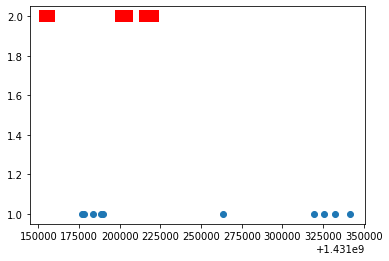

In [ ]:
y=np.ones(10)
y1=np.array([2,2])
plt.scatter(arr_err,y)
#plt.fill_between(1,anomalies['start'][0],anomalies['end'][0])
temp_arr = np.array([anomalies['start'][0],anomalies['end'][0]])
plt.plot(temp_arr,y1,color='r',linewidth=12)
temp_arr = np.array([anomalies['start'][1],anomalies['end'][1]])
plt.plot(temp_arr,y1,color='r',linewidth=12)
temp_arr = np.array([anomalies['start'][2],anomalies['end'][2]])
plt.plot(temp_arr,y1,color='r',linewidth=12)
temp_arr = np.array([anomalies['start'][3],anomalies['end'][3]])
plt.plot(temp_arr,y1,color='r', linewidth = 12)
plt.show()